Library import

In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats


Since we still have some missing valuse in the overall data frame, and because we are intrested to explore only rew countries with the most ascending death rates throw the years (of course Israel is included) we will extract those countries first and the we will see how can comlete the missing data if it is relevant!

In [100]:
RelevantCountriesList=['Austria',
 'Czech Republic',
 'Finland',
 'France',
 'Germany',
 'Hungary',
 'Ireland',
 'Italy',
 'Lithuania',
 'Netherlands',
 'Norway',
 'Poland',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States',
 'Israel']

In [101]:
DfsList=list()
for country in RelevantCountriesList:
    tempDf=pd.read_csv('./CountryDataFrames/'+country+'.csv')
    DfsList.append(tempDf)

CountryVS_Dfs=pd.DataFrame({"Country":RelevantCountriesList,"Data_frame":DfsList})

We need to see if there is a decriment of road casulties during the years.
By calculating the slpoe of liniar regression we can conclude if the road casulties ("Killed") rate is ascending or not

In [102]:
slopeList=list()
for i in CountryVS_Dfs.index:
    Df=CountryVS_Dfs.iloc[i,1]
    countryName=CountryVS_Dfs.iloc[i,0]
    X=Df["Year"]
    Y=Df["Killed"]
    Y=[j/sum(Y) for j in Y]        # normlyzing the killed value
    slope,intercept,r,p,std_err=stats.linregress(X,Y)
    slopeList.append(slope)

In [103]:
CountryVS_Dfs["slope"]=slopeList

Here are the results

In [104]:
CountryVS_Dfs

,Country,Data_frame,slope
0,Austria,Unnamed: 0 Country Year \ 0 ...,-0.003490
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-0.003122
2,Finland,Unnamed: 0 Country Year \ 0 ...,-0.002080
3,France,Unnamed: 0 Country Year \ 0 3...,-0.002628
4,Germany,Unnamed: 0 Country Year \ 0 ...,-0.002457
5,Hungary,Unnamed: 0 Country Year \ 0 ...,-0.001873
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-0.003234
7,Italy,Unnamed: 0 Country Year \ 0 7...,-0.003089
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-0.005855
9,Netherlands,Unnamed: 0 Country Year \ 0 ...,-0.000488


We need to multipy the slope column by 1000 for conviniance

In [105]:
CountryVS_Dfs["slope"]=CountryVS_Dfs["slope"]*1000

In [106]:
CountryVS_Dfs

,Country,Data_frame,slope
0,Austria,Unnamed: 0 Country Year \ 0 ...,-3.490471
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-3.121533
2,Finland,Unnamed: 0 Country Year \ 0 ...,-2.079815
3,France,Unnamed: 0 Country Year \ 0 3...,-2.628182
4,Germany,Unnamed: 0 Country Year \ 0 ...,-2.456849
5,Hungary,Unnamed: 0 Country Year \ 0 ...,-1.873433
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-3.233515
7,Italy,Unnamed: 0 Country Year \ 0 7...,-3.089455
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
9,Netherlands,Unnamed: 0 Country Year \ 0 ...,-0.487993


Now we will sort the Data frame by ascending values of the slop, means the the country with the most negative slope will be first

In [107]:
CountryVS_Dfs.sort_values(by="slope",ascending=True,inplace=True)

In [108]:
CountryVS_Dfs

,Country,Data_frame,slope
10,Norway,Unnamed: 0 Country Year \ 0 10...,-6.570302
8,Lithuania,Unnamed: 0 Country Year \ 0 ...,-5.854503
15,Switzerland,Unnamed: 0 Country Year \ 0 ...,-4.650940
12,Slovenia,Unnamed: 0 Country Year \ 0 ...,-4.176517
11,Poland,Unnamed: 0 Country Year \ 0 11...,-4.009028
0,Austria,Unnamed: 0 Country Year \ 0 ...,-3.490471
6,Ireland,Unnamed: 0 Country Year \ 0 ...,-3.233515
1,Czech Republic,Unnamed: 0 Country Year \ 0 ...,-3.121533
7,Italy,Unnamed: 0 Country Year \ 0 7...,-3.089455
13,Spain,Unnamed: 0 Country Year \ 0 13...,-3.002822


We rae defining a utillity function which help us generate plots

In [122]:
def plotOfKilled(country):
    row=CountryVS_Dfs[CountryVS_Dfs["Country"]==country]
    df=row.iloc[0,1]
    X=df["Year"]
    Y=df["Killed"]
    Y=[j/sum(Y) for j in Y]
    plt.title(country)
    return plt.plot(X,Y)

Now Let's use some visualization for the canedate counties: 
4 countries whitch hace the most descending killing rate , The USA and Israel.
We intend to perform ML on those countries

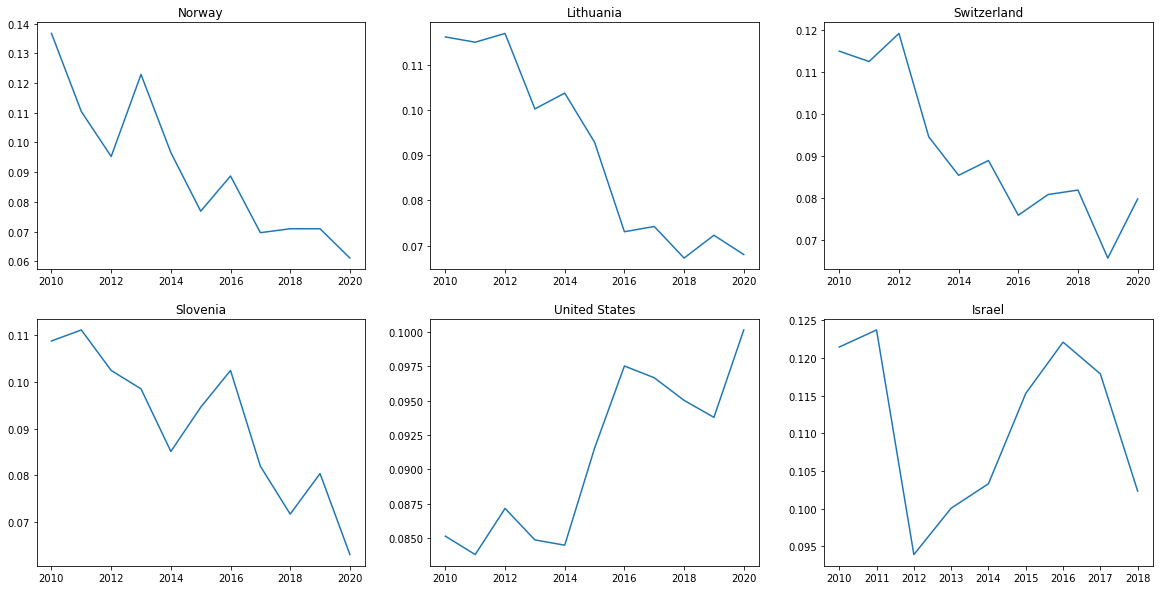

In [127]:
f=plt.figure(figsize=(20,10))
ax1=plt.subplot(231)
ax1.plot=plotOfKilled("Norway")

ax2=plt.subplot(232)
ax2.plot=plotOfKilled("Lithuania")

ax3=plt.subplot(233)
ax3.plot=plotOfKilled("Switzerland")

ax4=plt.subplot(234)
ax4.plot=plotOfKilled("Slovenia")

ax5=plt.subplot(235)
ax5.plot=plotOfKilled("United States")

ax6=plt.subplot(236)
ax6.plot=plotOfKilled("Israel")


